## HW5

   ### Name : Ashvant Ram Selvam

###  Roll No. : 8569202378

1. Supervised, Semi-Supervised, and Unsupervised Learning
(a) Download the Blood Transfusion Service Center Data Set from: https://archive.
ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center. This data has
two output classes.Use the first 20% of the positive and negative classes in the
file as the test set and the rest as the training set

In [100]:
import pandas as pd
fileData = pd.read_csv("transfusion.csv",header=None)
columnList=["Recency","Frequency","Monetary","Time","Class"]
fileData.columns = columnList
print(fileData)

     Recency  Frequency  Monetary  Time  Class
0          2         50     12500    98      1
1          0         13      3250    28      1
2          1         16      4000    35      1
3          2         20      5000    45      1
4          1         24      6000    77      0
5          4          4      1000     4      0
6          2          7      1750    14      1
7          1         12      3000    35      0
8          2          9      2250    22      1
9          5         46     11500    98      1
10         4         23      5750    58      0
11         0          3       750     4      0
12         2         10      2500    28      1
13         1         13      3250    47      0
14         2          6      1500    15      1
15         2          5      1250    11      1
16         2         14      3500    48      1
17         2         15      3750    49      1
18         2          6      1500    15      1
19         2          3       750     4      1
20         2 

In [101]:
from sklearn.model_selection import train_test_split,GridSearchCV

X = pd.DataFrame()

y = np.array(fileData["Class"])
X = fileData.drop(["Class"],axis=1)

from sklearn.preprocessing import MinMaxScaler
trainDataNonormalize = X
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
# X = normalize(X)
# X.columns = columnList[0:4]
X=pd.concat([X,y],axis=1)
X.columns = columnList

X_pos = X[X["Class"]==1]
X_neg = X[X["Class"]==0]

X_test = pd.concat([X_pos[:int(len(X_pos)*.20)],X_neg[:int(len(X_neg)*.20)]])
X_train = pd.concat([X_pos[int(len(X_pos)*.20):],X_neg[int(len(X_neg)*.20):]])

y_train = X_train["Class"]
y_test = X_test["Class"]

X_train = X_train.drop(["Class"],axis=1)
X_test = X_test.drop(["Class"],axis=1)
# y_pos = X_pos["Class"]
# X_pos = X_pos.drop(["Class"],axis=1)

# y_neg = X_neg["Class"]
# X_neg = X_neg.drop(["Class"],axis=1)

# X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.20)
# X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.20)

# X_train = pd.concat([X_train_pos,X_train_neg])
# X_test = pd.concat([X_test_pos,X_test_neg])
# y_train = pd.concat([y_train_pos,y_train_neg])
# y_test = pd.concat([y_test_pos,y_test_neg])
# print(trainDataNonormalize)
# print(X)

In [102]:
print(y_train)
print(X_train)

57     1
61     1
63     1
64     1
66     1
72     1
74     1
75     1
76     1
80     1
84     1
89     1
90     1
97     1
98     1
99     1
100    1
101    1
110    1
113    1
116    1
119    1
120    1
121    1
122    1
123    1
126    1
128    1
129    1
144    1
      ..
717    0
718    0
719    0
720    0
721    0
722    0
723    0
724    0
725    0
726    0
727    0
728    0
729    0
730    0
731    0
733    0
734    0
735    0
736    0
737    0
738    0
739    0
740    0
741    0
742    0
743    0
744    0
745    0
746    0
747    0
Name: Class, Length: 599, dtype: int64
      Recency  Frequency  Monetary      Time
57   0.027027   0.122449  0.122449  0.270833
61   0.027027   0.142857  0.142857  0.343750
63   0.054054   0.081633  0.081633  0.145833
64   0.027027   0.040816  0.040816  0.072917
66   0.027027   0.061224  0.061224  0.125000
72   0.054054   0.326531  0.326531  0.718750
74   0.027027   0.020408  0.020408  0.020833
75   0.027027   0.020408  0.020408  0.020833
76   0.

(b) Supervised Learning: Train an L1-penalized SVM to classify the data. Use
5 fold cross validation to choose the penalty parameter. Use normalized data.
Report the accuracy, AUC, ROC, and confusion matrix for both training and test
sets.

In [103]:
import numpy as np
from sklearn.svm import LinearSVC

In [104]:
def fit_linear(trainDataLinear, trainLabelLinear):
    params = {'C':(10**np.array([value for value in range(0,6)]))/100}
    svc = LinearSVC(penalty='l1', dual = False)
    classifier = GridSearchCV(svc, params, cv=5)
    classifier.fit(trainDataLinear, trainLabelLinear)
    print("Best Weight of SVM penalty   = ", classifier.best_params_['C'])
    return classifier

In [105]:
svc_L1 = fit_linear(X_train, y_train)

Best Weight of SVM penalty   =  0.1


In [106]:
result_train = pd.DataFrame()
result_train["actual"] = y_train
result_train["predicted"] = svc_L1.predict(X_train)
result_train["score"] = svc_L1.decision_function(X_train)
result_test = pd.DataFrame()
result_test["actual"] = y_test
result_test["predicted"] = svc_L1.predict(X_test)
result_test["score"] = svc_L1.decision_function(X_test)

In [107]:
print(result_train.abs())
print(result_test.abs())

     actual  predicted     score
57      1.0        0.0  0.193331
61      1.0        0.0  0.194620
63      1.0        0.0  0.257743
64      1.0        0.0  0.208154
66      1.0        0.0  0.205004
72      1.0        0.0  0.208831
74      1.0        0.0  0.211305
75      1.0        0.0  0.211305
76      1.0        0.0  0.209444
80      1.0        0.0  0.259033
84      1.0        0.0  0.207583
89      1.0        0.0  0.208873
90      1.0        0.0  0.273857
97      1.0        0.0  0.249581
98      1.0        0.0  0.267555
99      1.0        0.0  0.282717
100     1.0        0.0  0.254952
101     1.0        0.0  0.214392
110     1.0        0.0  0.273286
113     1.0        0.0  0.268274
116     1.0        0.0  0.233297
119     1.0        0.0  0.249558
120     1.0        0.0  0.223697
121     1.0        0.0  0.279947
122     1.0        0.0  0.236448
123     1.0        0.0  0.232938
126     1.0        0.0  0.281596
128     1.0        0.0  0.286037
129     1.0        0.0  0.224627
144     1.

Accuracy =  0.766277128548
		Confusion Matrix
True Positives :  4
True Negatives :  455
False Positives :  1
False Negatives :  139


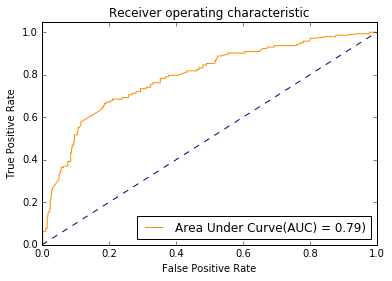

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

print("Accuracy = " ,accuracy_score(result_train["actual"], result_train["predicted"]))

tn, fp, fn, tp = confusion_matrix(result_train["actual"],result_train["predicted"]).ravel()
print("\t\tConfusion Matrix")
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

#Code from scikit learn documentation example

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(result_train["actual"], result_train["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(result_train["actual"].ravel(),  result_train["score"].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy =  0.778523489933
		Confusion Matrix
True Positives :  2
True Negatives :  114
False Positives :  0
False Negatives :  33


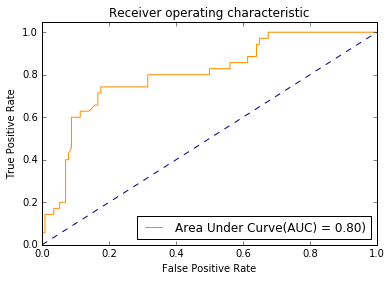

In [109]:
print("Accuracy = " ,accuracy_score(result_test["actual"], result_test["predicted"]))

tn, fp, fn, tp = confusion_matrix(result_test["actual"],result_test["predicted"]).ravel()
print("\t\tConfusion Matrix")
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

#Code from scikit learn documentation example

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(result_test["actual"], result_test["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(result_test["actual"].ravel(),  result_test["score"].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

(c) Semi-Supervised Learning/ Self-training: select 50% of the positive class
along with 50% of the negative class in the training set as labeled data and the
rest as unlabelled data. You can select them randomly.
i. Train an L1-penalized SVM to classify the labeled data. Choose the penalty
parameter using 5 fold cross validation.

In [117]:
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

In [118]:
svc_L1 = fit_linear(X_label, y_label)

Best Weight of SVM penalty   =  1.0


In [119]:
print(len(X_label))

299


In [120]:
def nearest(svc,trainData):
    dist = []
    dist = svc.decision_function(trainData)
    dist = np.absolute(dist)
    indexes_next = np.argsort(dist)[:1]
    indexes_remainder = set(range(trainData.shape[0])) - set(indexes_next)
    trainData_remainder = trainData[list(indexes_remainder)]
    trainData_nearest = trainData[indexes_next]
    return trainData_nearest, trainData_remainder

In [121]:
X_unlabel_remainder = np.array(X_unlabel)
for i in range(299):
    nearestData,X_unlabel_remainder = nearest(svc_L1,X_unlabel_remainder)
    label = svc_L1.predict(nearestData)
    X_label = np.concatenate([X_label,nearestData])
    y_label = np.concatenate([y_label,label])
    print(nearestData,"added with label",label)
    svc_L1 = fit_linear(X_label, y_label)

[[ 0.02702703  0.20408163  0.20408163  0.25      ]] added with label [1]
Best Weight of SVM penalty   =  10.0
[[ 0.02702703  0.28571429  0.28571429  0.64583333]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.02702703  0.20408163  0.20408163  0.21875   ]] added with label [1]
Best Weight of SVM penalty   =  10.0
[[ 0.02702703  0.20408163  0.20408163  0.39583333]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.05405405  0.24489796  0.24489796  0.38541667]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.02702703  0.24489796  0.24489796  0.3125    ]] added with label [1]
Best Weight of SVM penalty   =  1.0
[[ 0.05405405  0.18367347  0.18367347  0.27083333]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.05405405  0.30612245  0.30612245  0.375     ]] added with label [1]
Best Weight of SVM penalty   =  1.0
[[ 0.04054054  0.18367347  0.18367347  0.32291667]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.06756757  0.

Best Weight of SVM penalty   =  100.0
[[ 0.18918919  0.14285714  0.14285714  0.25      ]] added with label [0]
Best Weight of SVM penalty   =  100.0
[[ 0.12162162  0.16326531  0.16326531  0.44791667]] added with label [0]
Best Weight of SVM penalty   =  100.0
[[ 0.05405405  0.          0.          0.02083333]] added with label [0]
Best Weight of SVM penalty   =  100.0
[[ 0.05405405  0.          0.          0.02083333]] added with label [0]
Best Weight of SVM penalty   =  100.0
[[ 0.05405405  0.          0.          0.02083333]] added with label [0]
Best Weight of SVM penalty   =  100.0
[[ 0.14864865  0.30612245  0.30612245  0.90625   ]] added with label [0]
Best Weight of SVM penalty   =  100.0
[[ 0.05405405  0.          0.          0.02083333]] added with label [0]
Best Weight of SVM penalty   =  10.0
[[ 0.05405405  0.          0.          0.02083333]] added with label [0]
Best Weight of SVM penalty   =  10.0
[[ 0.28378378  0.30612245  0.30612245  0.64583333]] added with label [0]
Bes

Best Weight of SVM penalty   =  1.0
[[ 0.18918919  0.08163265  0.08163265  0.5       ]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.05405405  0.02040816  0.02040816  0.52083333]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.21621622  0.02040816  0.02040816  0.25      ]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.05405405  0.08163265  0.08163265  0.75      ]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.21621622  0.04081633  0.04081633  0.34375   ]] added with label [0]
Best Weight of SVM penalty   =  1.0
[[ 0.02702703  0.85714286  0.85714286  0.875     ]] added with label [1]
Best Weight of SVM penalty   =  0.1
[[ 0.14864865  0.12244898  0.12244898  0.76041667]] added with label [0]
Best Weight of SVM penalty   =  0.1
[[ 0.02702703  0.04081633  0.04081633  0.78125   ]] added with label [0]
Best Weight of SVM penalty   =  0.1
[[ 0.05405405  0.04081633  0.04081633  0.71875   ]] added with label [0]
Best Weight of SVM 

In [122]:
result_test = pd.DataFrame()
result_test["actual"] = y_test
result_test["predicted"] = svc_L1.predict(X_test)
result_test["score"] = svc_L1.decision_function(X_test)

ii. Find the unlabeled data point that is the closest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to the
labeled data, and retrain the SVM. Continue this process until all unlabeled
data are used. Test the final SVM on the test data and report the accuracy,
AUC, ROC, and confusion matrix for the test set.

Accuracy =  0.778523489933
		Confusion Matrix
True Positives :  2
True Negatives :  114
False Positives :  0
False Negatives :  33


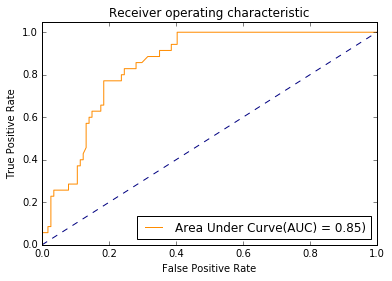

In [123]:
print("Accuracy = " ,accuracy_score(result_test["actual"], result_test["predicted"]))

tn, fp, fn, tp = confusion_matrix(result_test["actual"],result_test["predicted"]).ravel()
print("\t\tConfusion Matrix")
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

#Code from scikit learn documentation example

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(result_test["actual"], result_test["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(result_test["actual"].ravel(),  result_test["score"].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

(d) Unsupervised Learning: Run k-means algorithm on the whole training set.
Ignore the labels of the data, and assume k = 2.
i. Run the k-means algorithm multiple times. How do you make sure that the
algorithm was not trapped in a local minimum?

Repeated clustering can reduce the chances of the algorithm getting trapped in the local minimum. But, there is always a chance for k means algorithm to get trapped in alocal minimum even if the algorithm is repeated multiple times.

In [2]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0,n_init=20).fit(X_train)
distances = kmeans.transform(X_train)

In [218]:
print(distances)

[[ 0.32394601  0.28397111]
 [ 0.10848765  0.42218105]
 [ 0.11862321  0.60361338]
 ..., 
 [ 0.16189877  0.32841505]
 [ 0.0986096   0.43286647]
 [ 0.55214002  0.13633455]]


ii. Compute the centers of the two clusters and find the closest 30 data points to
each center. Read the true labels of those 30 data points and take a majority
poll within them. The majority poll becomes the label predicted by k-means
for the members of each cluster. Then compare the labels provided by kmeans
with the true labels of the training data and report accuracy and the
confusion matrix.1

In [234]:
print("cluster 1")
predict1 = y_train[pd.DataFrame(distances).sort_values([0])[:30].index]
print(predict1)
print("class 0 = ", 30 - np.sum(predict1))
print("class 1 = ", np.sum(predict1))
print("cluster 2")
predict2 = y_train[pd.DataFrame(distances).sort_values([1])[:30].index]
print(predict2)
print("class 0 = ", 30 - np.sum(predict2))
print("class 1 = ", np.sum(predict2))

cluster 1
[0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
class 0 =  24
class 1 =  6
cluster 2
[0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0]
class 0 =  23
class 1 =  7


Since Kmeans clustering failed to cluster data based on the true labels in majority voting , the dataset was checked for imbalance using Instance Hardness Thresholding.

In [272]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=42,ratio="majority")
X_train_balance, y_train_balance = iht.fit_sample(X_train, y_train)

In [273]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_balance)
distances = kmeans.transform(X_train_balance)

In [274]:
print("cluster 1")
predict1 = y_train[pd.DataFrame(distances).sort_values([0])[:30].index]
print(predict1)
print("class 0 = ", 30 - np.sum(predict1))
print("class 1 = ", np.sum(predict1))
print("cluster 2")
predict2 = y_train[pd.DataFrame(distances).sort_values([1])[:30].index]
print(predict2)
print("class 0 = ", 30 - np.sum(predict2))
print("class 1 = ", np.sum(predict2))

cluster 1
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0]
class 0 =  22
class 1 =  8
cluster 2
[0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
class 0 =  21
class 1 =  9


iii. Classify test data based on their proximity to the centers of the clusters.
Report accuracy and confusion matrix for the test data

Even after using Instance Hardness Thresholding the 2 clusters seem to be biased towards the same label. Hence accuracy, auc and roc are not calculated as we are not able to construct a classifier from Kmeans for this dataset.

2.K-Means Clustering on a Multi-Class and Multi-Label Data Set
(a) Use k-means clustering on Anuran Calls (MFCCs) Data Set of Homework 4.
Choose k automatically based on one of the methods provided in the slides (CH
or Gap Statistics or scree plots) or any other method you know.

In [275]:
print(len(y_train_balance))
print(np.sum(y_train_balance))

310
142


In [3]:
import pandas as pd
import numpy as np
fileData = pd.read_csv("Frogs_MFCCs.csv")
print(fileData)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
5          1.0  0.099704 -0.033408  0.349895  0.344535  0.247569  0.022407   
6          1.0  0.021676 -0.062075  0.318229  0.380439  0.179043 -0.041667   
7          1.0  0.145130 -0.033660  0.284166  0.279537  0.175211  0.005791   
8          1.0  0.271326  0.027777  0.375738  0.385432  0.272457  0.098192   
9          1.0  0.120565 -0.107235  0.316555  0.364437  0.307757  0.025992   
10         1.0  0.148539 -0.096910  0.257523  0.260881  0.312603  0.134134   
11         1.0  0.277948  0.091657  0.331656  0.307372  0.257359

In [4]:
dataLabel = pd.DataFrame(fileData[["Family","Species","Genus"]])
fileData = fileData.drop(["Family", "Genus", "Species", "RecordID"], axis=1)
fileData

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.295123,0.012486,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.236428,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.250981,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.282427,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.328433,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025


In [5]:
from sklearn import metrics

In [6]:
ch = list()
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(fileData)
    labels = kmeans.labels_
    ch.append(metrics.silhouette_score(fileData, labels))
print(ch)

[0.34867784102771521, 0.36768245219926315, 0.37888514720477384, 0.3714828057802203, 0.26400802111671501, 0.26063587785642767, 0.27011271247253021, 0.25934846502145248, 0.27452824586472718, 0.27378927925052898, 0.27006763120510002, 0.27515917098506426, 0.26482222220413809, 0.27173408887869066, 0.27458672419078123, 0.274057672979025, 0.27700054499812909, 0.27828330610097096]


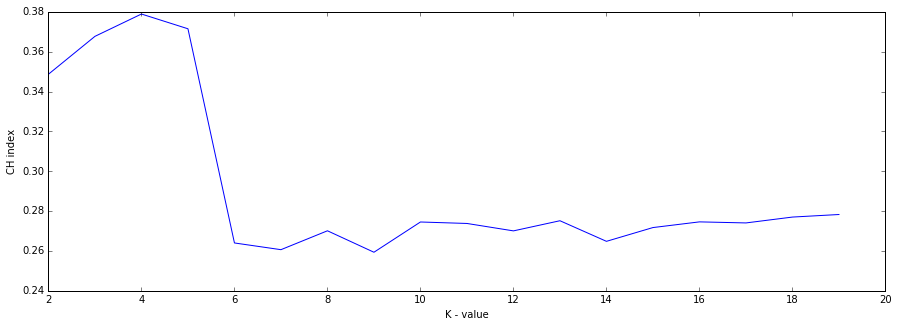

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
x_axis = range(2,20)
plt.plot(x_axis, ch,label='CH index')
plt.ylabel('CH index')
plt.xlabel('K - value')
plt.show()

The optimal clustering is done for K=4.

(b) In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(fileData)

In [9]:
labels = kmeans.labels_

In [10]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [12]:
cluster1_index = labels==0

In [13]:
cluster1_index

array([False, False, False, ..., False, False, False], dtype=bool)

In [14]:
cluster1 = dataLabel[cluster1_index]

In [15]:
cluster1

,Family,Species,Genus
1214,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1215,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1216,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1217,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1218,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1219,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1220,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1221,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1222,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
1223,Leptodactylidae,AdenomeraHylaedactylus,Adenomera


In [126]:
print(cluster1["Family"].value_counts())
dataLabel.loc[cluster1_index,"family_predicted"] = cluster1["Family"].value_counts().keys()[0]

Leptodactylidae    3467
Hylidae             101
Name: Family, dtype: int64


In [124]:
print(cluster1["Genus"].value_counts())
dataLabel.loc[cluster1_index,"genus_predicted"] = cluster1["Genus"].value_counts().keys()[0]

Adenomera        3466
Dendropsophus      86
Hypsiboas          12
Scinax              3
Leptodactylus       1
Name: Genus, dtype: int64


In [125]:
print(cluster1["Species"].value_counts())
dataLabel.loc[cluster1_index,"species_predicted"] = cluster1["Species"].value_counts().keys()[0]

AdenomeraHylaedactylus    3466
HylaMinuta                  86
HypsiboasCordobae           12
ScinaxRuber                  3
LeptodactylusFuscus          1
Name: Species, dtype: int64


In [40]:
cluster2_index = (labels==1)
cluster2 = dataLabel[cluster2_index]
cluster2

,Family,Species,Genus
0,Leptodactylidae,AdenomeraAndre,Adenomera
1,Leptodactylidae,AdenomeraAndre,Adenomera
2,Leptodactylidae,AdenomeraAndre,Adenomera
3,Leptodactylidae,AdenomeraAndre,Adenomera
4,Leptodactylidae,AdenomeraAndre,Adenomera
5,Leptodactylidae,AdenomeraAndre,Adenomera
6,Leptodactylidae,AdenomeraAndre,Adenomera
7,Leptodactylidae,AdenomeraAndre,Adenomera
8,Leptodactylidae,AdenomeraAndre,Adenomera
9,Leptodactylidae,AdenomeraAndre,Adenomera


In [41]:
cluster2["Family"].value_counts()

Dendrobatidae      503
Leptodactylidae    302
Hylidae            229
Name: Family, dtype: int64

In [42]:
cluster2["Genus"].value_counts()

Ameerega         503
Adenomera        296
Dendropsophus    189
Scinax            39
Leptodactylus      6
Hypsiboas          1
Name: Genus, dtype: int64

In [43]:
cluster2["Species"].value_counts()

Ameeregatrivittata     503
AdenomeraAndre         296
HylaMinuta             189
ScinaxRuber             39
LeptodactylusFuscus      6
HypsiboasCordobae        1
Name: Species, dtype: int64

In [83]:
dataLabel.loc[cluster2_index,"family_predicted"] = cluster2["Family"].value_counts().keys()[0]
dataLabel.loc[cluster2_index,"genus_predicted"] = cluster2["Genus"].value_counts().keys()[0]
dataLabel.loc[cluster2_index,"species_predicted"] = cluster2["Species"].value_counts().keys()[0]

In [44]:
cluster3_index = (labels==2)
cluster3 = dataLabel[cluster3_index]
cluster3

,Family,Species,Genus
73,Leptodactylidae,AdenomeraAndre,Adenomera
77,Leptodactylidae,AdenomeraAndre,Adenomera
437,Leptodactylidae,AdenomeraAndre,Adenomera
439,Leptodactylidae,AdenomeraAndre,Adenomera
463,Leptodactylidae,AdenomeraAndre,Adenomera
564,Leptodactylidae,AdenomeraAndre,Adenomera
1331,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
2894,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
2896,Leptodactylidae,AdenomeraHylaedactylus,Adenomera
2897,Leptodactylidae,AdenomeraHylaedactylus,Adenomera


In [45]:
cluster3["Family"].value_counts()

Hylidae            587
Leptodactylidae     21
Bufonidae            2
Name: Family, dtype: int64

In [46]:
cluster3["Genus"].value_counts()

Hypsiboas        540
Osteocephalus     37
Adenomera         12
Scinax            10
Leptodactylus      9
Rhinella           2
Name: Genus, dtype: int64

In [47]:
cluster3["Species"].value_counts()

HypsiboasCinerascens      452
HypsiboasCordobae          88
OsteocephalusOophagus      37
ScinaxRuber                10
LeptodactylusFuscus         9
AdenomeraHylaedactylus      6
AdenomeraAndre              6
Rhinellagranulosa           2
Name: Species, dtype: int64

In [85]:
dataLabel.loc[cluster3_index,"family_predicted"] = cluster3["Family"].value_counts().keys()[0]
dataLabel.loc[cluster3_index,"genus_predicted"] = cluster3["Genus"].value_counts().keys()[0]
dataLabel.loc[cluster3_index,"species_predicted"] = cluster3["Species"].value_counts().keys()[0]

In [48]:
cluster4_index = (labels==3)
cluster4 = dataLabel[cluster4_index]
cluster4

,Family,Species,Genus
71,Leptodactylidae,AdenomeraAndre,Adenomera
72,Leptodactylidae,AdenomeraAndre,Adenomera
300,Leptodactylidae,AdenomeraAndre,Adenomera
301,Leptodactylidae,AdenomeraAndre,Adenomera
302,Leptodactylidae,AdenomeraAndre,Adenomera
303,Leptodactylidae,AdenomeraAndre,Adenomera
304,Leptodactylidae,AdenomeraAndre,Adenomera
305,Leptodactylidae,AdenomeraAndre,Adenomera
306,Leptodactylidae,AdenomeraAndre,Adenomera
307,Leptodactylidae,AdenomeraAndre,Adenomera


In [49]:
cluster4["Family"].value_counts()

Hylidae            1248
Leptodactylidae     630
Bufonidae            66
Dendrobatidae        39
Name: Family, dtype: int64

In [50]:
cluster4["Genus"].value_counts()

Hypsiboas        1040
Adenomera         376
Leptodactylus     254
Scinax             96
Osteocephalus      77
Rhinella           66
Ameerega           39
Dendropsophus      35
Name: Genus, dtype: int64

In [51]:
cluster4["Species"].value_counts()

HypsiboasCordobae         1020
AdenomeraAndre             370
LeptodactylusFuscus        254
ScinaxRuber                 96
OsteocephalusOophagus       77
Rhinellagranulosa           66
Ameeregatrivittata          39
HylaMinuta                  35
HypsiboasCinerascens        20
AdenomeraHylaedactylus       6
Name: Species, dtype: int64

In [86]:
dataLabel.loc[cluster4_index,"family_predicted"] = cluster4["Family"].value_counts().keys()[0]
dataLabel.loc[cluster4_index,"genus_predicted"] = cluster4["Genus"].value_counts().keys()[0]
dataLabel.loc[cluster4_index,"species_predicted"] = cluster4["Species"].value_counts().keys()[0]

In [87]:
dataLabel

,Family,Species,Genus,family_predicted,genus_predicted,species_predicted
0,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
4,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
5,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
6,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
7,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
8,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata
9,Leptodactylidae,AdenomeraAndre,Adenomera,Dendrobatidae,Ameerega,Ameeregatrivittata


(c) Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance between the true labels and the labels
assigned by clusters.

In [52]:
 def hamming_loss(trueLabels,predictedLabels):
    total=0
    for trueRow,predictedRow in zip(trueLabels,predictedLabels):
        correct=0
        for a,b in zip(trueRow,predictedRow):
            if(a==b):
                correct+=1
        ratioOfCorrect = correct/len(trueRow)
        total+=ratioOfCorrect
    return total/len(trueLabels)        

In [89]:
actual = np.array([dataLabel["Family"],dataLabel["Species"],dataLabel["Genus"]])
predicted = np.array([dataLabel["family_predicted"],dataLabel["species_predicted"],dataLabel["genus_predicted"]])

In [90]:
loss = print("Hamming Loss : ", 1-hamming_loss(np.array(actual), predicted))

Hamming Loss :  0.22191336576326137


The above is the Hamming loss for labels determined by clusters.